<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/02_PyTorch_Classification_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Neural Network Classfication

https://www.youtube.com/watch?v=Z_ikDlimN6A

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), X.shape,len(y), y.shape

(1000, (1000, 2), 1000, (1000,))

In [4]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [5]:
import pandas as pd
import numpy as np

In [6]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "lable": y
                        }
                       )
circles.head(10)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

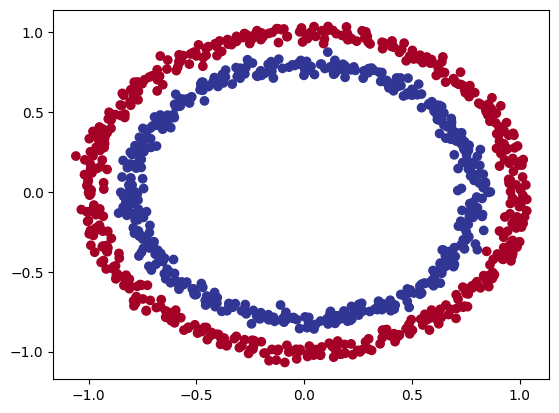

In [8]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=y,
            cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
import torch
from torch import nn

In [11]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModel().to(device)

In [16]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [17]:
 model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
 ).to(device)

In [18]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0901, -0.4990],
                      [-0.5216,  0.4861],
                      [-0.0978, -0.6648],
                      [-0.5581, -0.5630],
                      [-0.3825, -0.1802]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1444, -0.2646, -0.5482, -0.1375,  0.6303], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0914,  0.3640, -0.4108, -0.0262,  0.4265]], device='cuda:0')),
             ('1.bias', tensor([0.1746], device='cuda:0'))])

In [20]:
with torch.inference_mode():
  initial_preds = model_0(X_test.to(device))
initial_preds.shape

torch.Size([200, 1])

Text(0.5, 1.0, 'prediction results with untrained data')

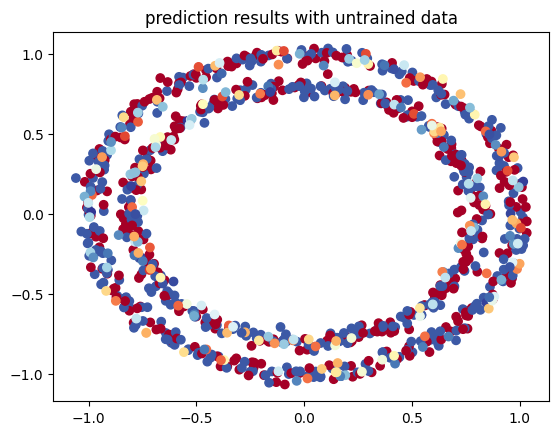

In [21]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=np.append(y_train,initial_preds.to("cpu").numpy()),
            cmap=plt.cm.RdYlBu)
plt.title("prediction results with untrained data")

In [22]:
#loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [23]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [24]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits.shape,y_logits[0:5,]

(torch.Size([200, 1]),
 tensor([[0.9378],
         [0.9131],
         [0.6967],
         [1.0074],
         [0.2113]], device='cuda:0'))

In [25]:
y_prediction_probabilities = torch.sigmoid(y_logits)
y_prediction_probabilities[0:5,]

tensor([[0.7187],
        [0.7136],
        [0.6675],
        [0.7325],
        [0.5526]], device='cuda:0')

In [26]:
y_predicted_lables = torch.round(y_prediction_probabilities)
y_predicted_lables[0:5,]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [28]:
epochs = 200
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)
    
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} Loss:{loss:.5f} Accuracy {accuracy:.5f} test_loss:{test_loss:.5f} test_accuracy:{test_accuracy:.5f}")

Epoch: 0 Loss:0.74416 Accuracy 50.00000 test_loss:0.74696 test_accuracy:50.00000
Epoch: 10 Loss:0.71488 Accuracy 59.37500 test_loss:0.71843 test_accuracy:55.00000
Epoch: 20 Loss:0.70449 Accuracy 52.62500 test_loss:0.70778 test_accuracy:52.00000
Epoch: 30 Loss:0.70028 Accuracy 51.25000 test_loss:0.70319 test_accuracy:53.50000
Epoch: 40 Loss:0.69829 Accuracy 51.62500 test_loss:0.70088 test_accuracy:51.50000
Epoch: 50 Loss:0.69717 Accuracy 51.00000 test_loss:0.69952 test_accuracy:52.50000
Epoch: 60 Loss:0.69644 Accuracy 49.87500 test_loss:0.69862 test_accuracy:51.50000
Epoch: 70 Loss:0.69590 Accuracy 50.50000 test_loss:0.69795 test_accuracy:51.50000
Epoch: 80 Loss:0.69549 Accuracy 50.37500 test_loss:0.69744 test_accuracy:50.50000
Epoch: 90 Loss:0.69515 Accuracy 49.87500 test_loss:0.69703 test_accuracy:51.00000
Epoch: 100 Loss:0.69486 Accuracy 49.75000 test_loss:0.69669 test_accuracy:51.00000
Epoch: 110 Loss:0.69462 Accuracy 50.12500 test_loss:0.69641 test_accuracy:50.00000
Epoch: 120 Loss